<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Reconocimiento de dígitos escritos a mano  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    


La base de datos MNIST (base de datos modificada del Instituto Nacional de Estándares y Tecnología) cuenta con 70,000 pequeñas imágenes de dígitos escritas a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE. UU.  Cada imagen está etiquetada con el dígito que representa, además cada una tiene 784 características (28 × 28 píxeles) y cada característica simplemente representa la intensidad de un píxel, de 0 (blanco) a 255 (negro).
    
   
<br>
</td>
</tr>
</table>

## 1. Obtenga los datos

Algunas fuentes: 

https://bit.ly/MnCD20     (Este tutorial)

http://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/c/digit-recognizer/data?select=sample_submission.csv



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Cargar el archivo de test datos/mnist_test_short.csv  (2,000 números)
df_test=pd.read_csv('datos/mnist_test_short.csv',header=None,dtype='uint8')
df_test=df_test.iloc[:500,:]
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Cargar el archivo de entrenamiento datos/mnist_train_short.csv  (12,000 números)
df_train=pd.read_csv('datos/mnist_train_short.csv',header=None,dtype='uint8')
df_train=df_train.iloc[:2000,:]
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Entendiendo la base de datos MNIST

In [4]:
# Mostrar los primeras filas del archivo de entrenamiento
# No tienen encabezado las columnas
# Columna 0: es el target o el digito escrito a mano
# Columna 1 a la 784: Pixeles en escala de 0 a 255
# Cada píxel tiene un valor de brillo comprendido entre 0 (negro) y 255 (blanco). 

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Encontrar el número 5 en el set de entrenamiento y mostrarlo

In [6]:
#Definir una variable que guarde los identificadores, es decir la primera columna
y_digits_train=df_train.iloc[:,0]
y_digits_train

0       5
1       0
2       4
3       1
4       9
       ..
1995    0
1996    5
1997    5
1998    2
1999    0
Name: 0, Length: 2000, dtype: uint8

In [7]:
#Crear una mascara para encontrar el indice de las filas con el número 5
y_digits_train[y_digits_train==5]

0       5
11      5
35      5
47      5
65      5
       ..
1978    5
1991    5
1993    5
1996    5
1997    5
Name: 0, Length: 180, dtype: uint8

In [8]:
# Guardar alguna fila en una variable llamada num5
num5=df_train.iloc[35].values[1:].reshape((28,28))

<function matplotlib.pyplot.show(close=None, block=None)>

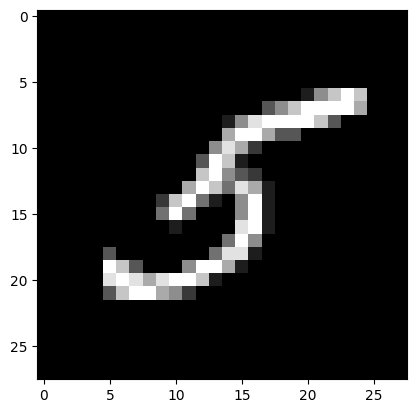

In [9]:
# Graficar la imagen del numero 5
plt.imshow(num5,cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

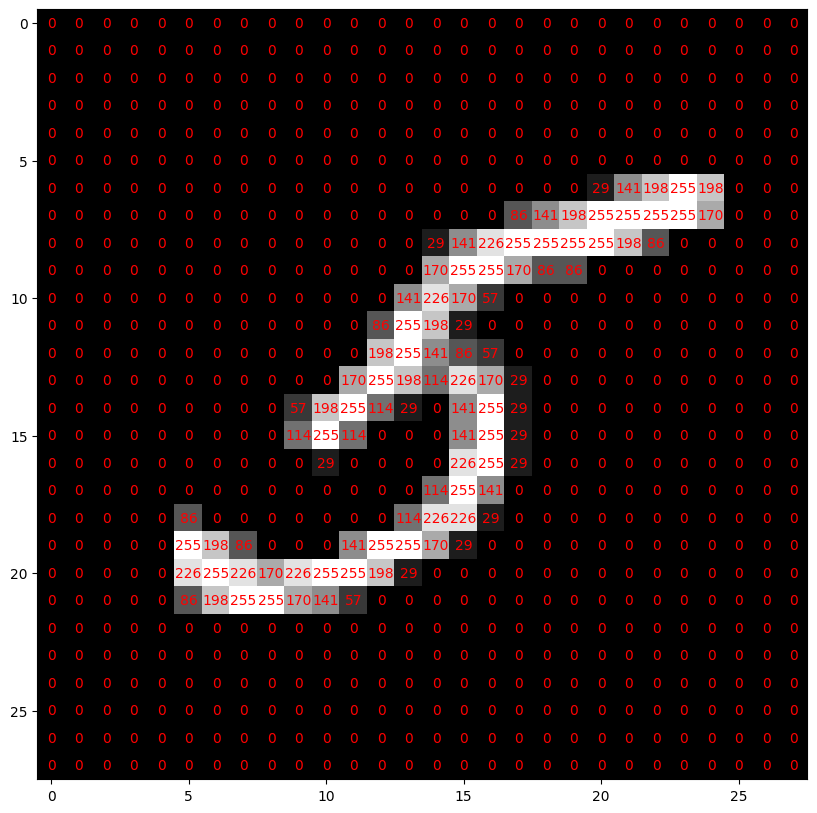

In [10]:
# mostrar los elementos que componen el arreglo sobre la imagen del numero 5
plt.figure(figsize=(10,10))
plt.imshow(num5,cmap='gray')
for (j,i), label in np.ndenumerate(num5):
    plt.text(i,j,label,ha='center',va='center',color='red')
plt.show

## 3. Prepare los datos 

In [11]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

## 4. Definimos el pipeline y el clasificador

In [12]:
#Definir el pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps=[
    ('scaler',StandardScaler()),
    ('SVM',SVC(kernel='poly'))
]
pipeline=Pipeline(steps)

## 5. Realizamos el tuning 

In [13]:
#Parámetros
# C = [0.0001,0.001]
# gamma = [20,10]
parametros={'SVM__C': [0.0001,0.001], 'SVM__gamma':[20,10]}

In [14]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline, param_grid=parametros, cv=5, n_jobs=-1, verbose=5)

In [15]:
#Ajuste
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [0.0001, 0.001], 'SVM__gamma': [20, 10]},
             verbose=5)

In [16]:
#mostrar los mejores valores del tuning
grid.best_params_

{'SVM__C': 0.0001, 'SVM__gamma': 20}

## 6. Probamos el clasificador SVM

In [17]:
# Encontrar el score
grid.score(X_test,y_test) 

0.898

In [18]:
# Realizar la predicción en los datos de test
y_pred=grid.predict(X_test)

In [19]:
#mostrar la predicción para los primeros 10 valores de prueba
y_pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9], dtype=uint8)

In [20]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: uint8

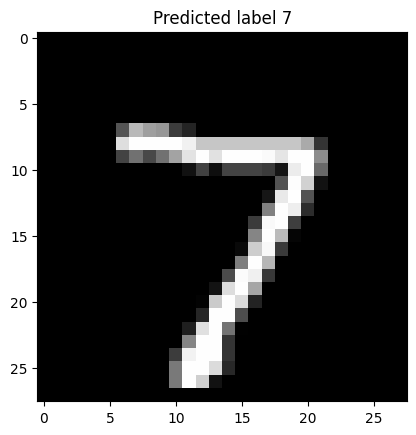

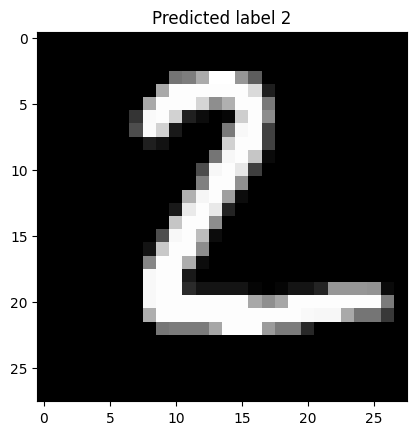

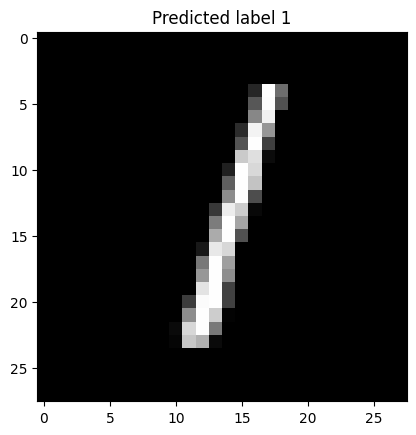

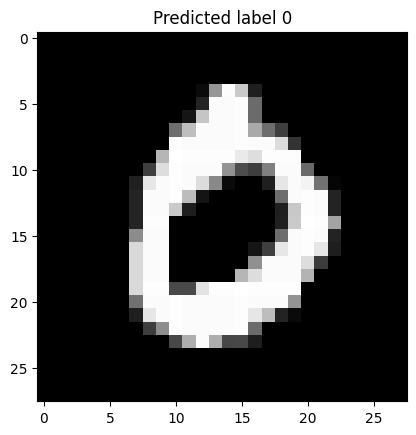

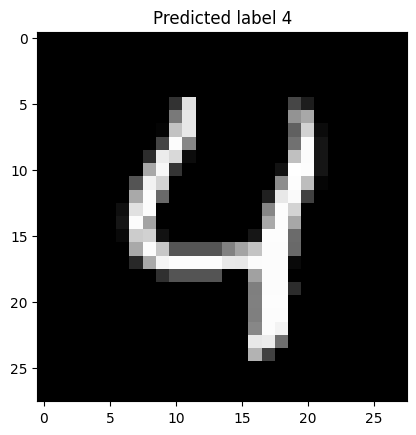

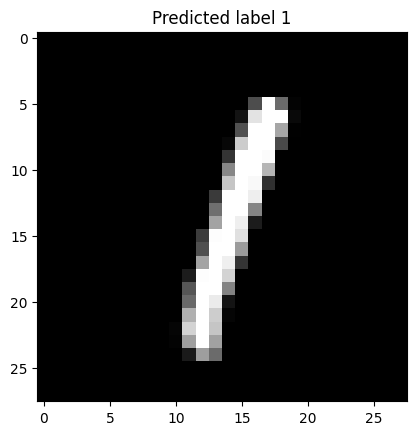

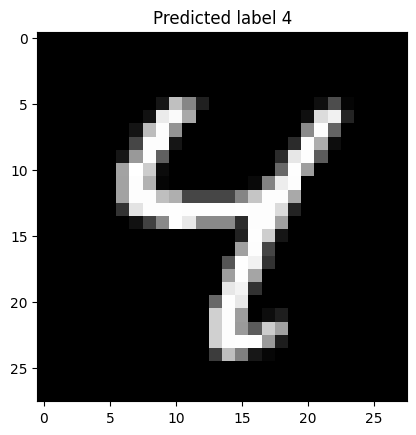

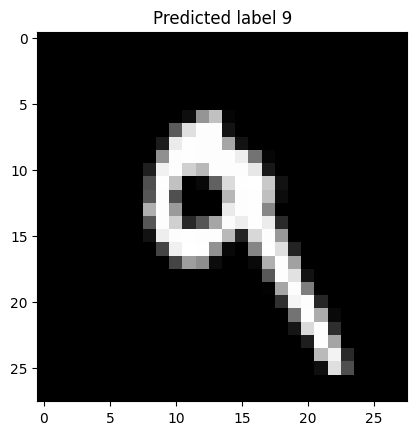

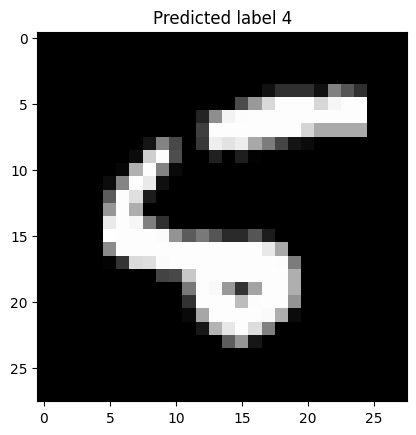

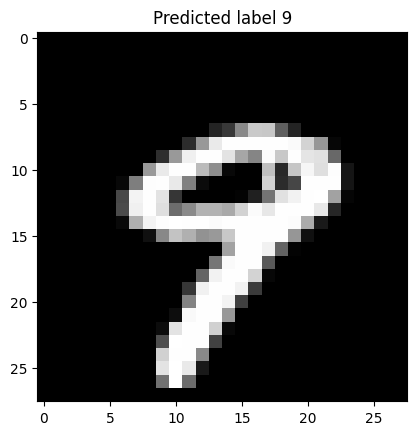

In [21]:
#Mostrar la prediccion y el número
for i in range(10):
    img=X_test.values[i].reshape((28,28))
    plt.title('Predicted label {0}'.format(y_pred[i]))
    plt.imshow(img,cmap='gray')
    plt.show()

### Probamos el clasificador SVM en nuestros propios números

In [22]:
#Guardar el archivo de mis números 'datos/mis_numeros.csv'
df_mn=pd.read_csv('datos/mis_numeros.csv',header=None,dtype='uint8')

In [23]:
#Definir una variable X e y para nuestros números
X_mn=df_mn.iloc[:,1:]
y_mn=df_mn.iloc[:,0]

In [24]:
#Realizar la predicción en nuestros números
y_pred_mn=grid.predict(X_mn)

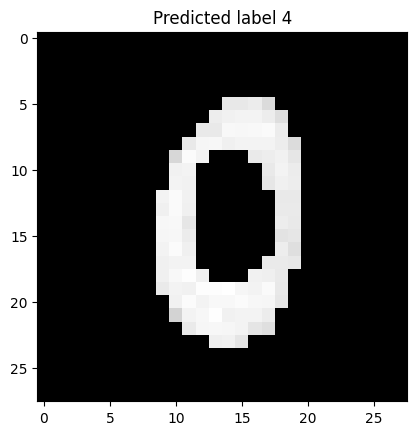

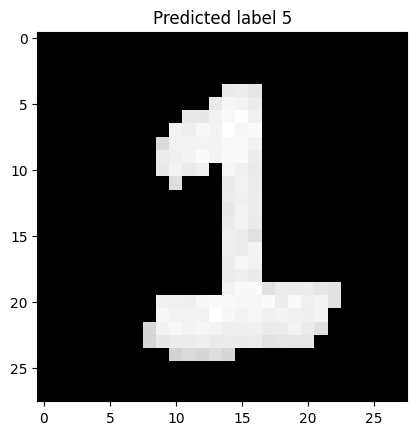

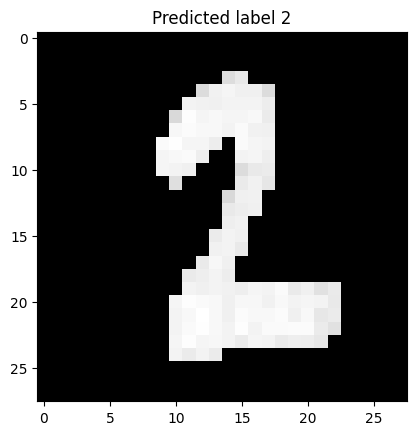

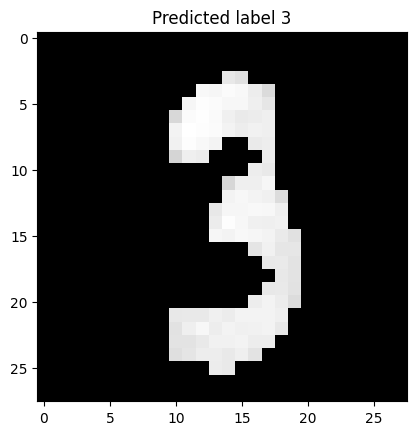

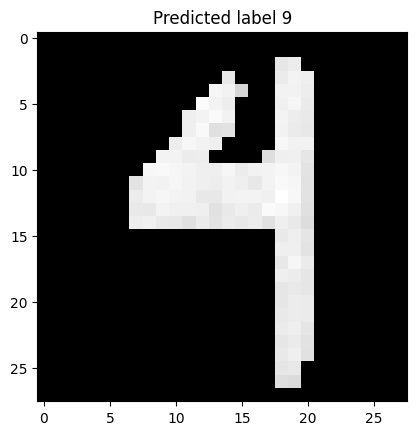

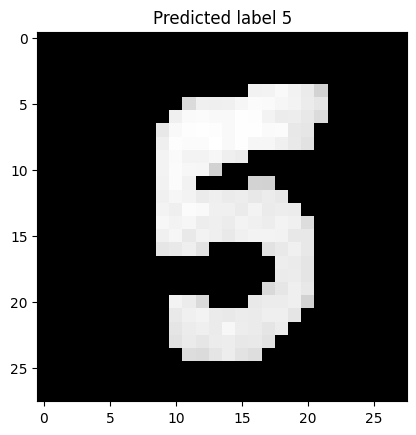

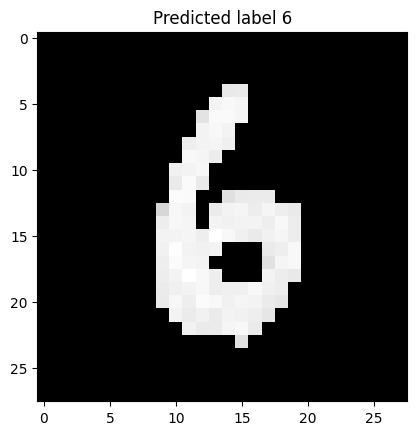

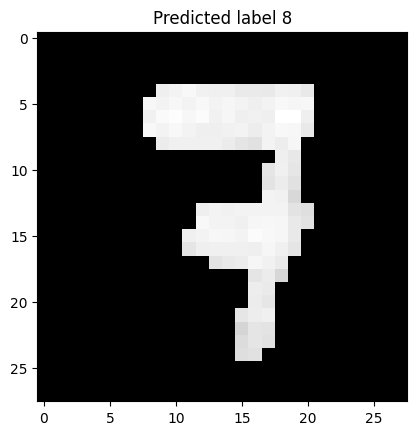

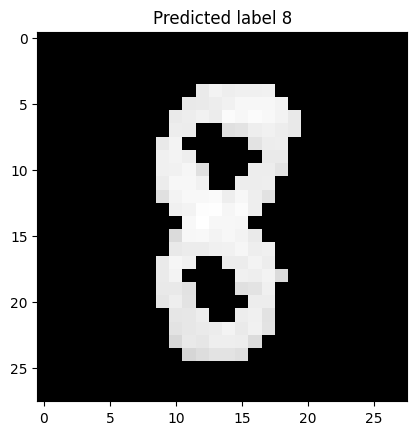

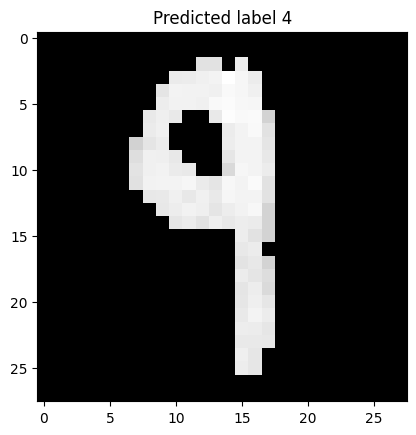

In [25]:
# Comparar la predicción con los valores reales
for i in range(10):
    img=X_mn.values[i].reshape((28,28))
    plt.title('Predicted label {0}'.format(y_pred_mn[i]))
    plt.imshow(img,cmap='gray')
    plt.show()

## 7. Matriz de confusión

### Casos posibles


Tomamos elementos de la muestra de prueba o test
<img src="figuras/PositivosNegativos.png" align="middle" style="width:650px;"/></td>

### Caso 1 : Verdaderos Negativos (VN)

Cuando los negativos que fueron clasificados correctamente como negativos por el modelo.

<img src="figuras/caso1.jpg" align="middle" style="width:750px;"/></td>


### Caso 2 : Verdaderos Positivos (VP)

Cuando los positivos que fueron clasificados correctamente como positivos por el modelo.

<img src="figuras/caso2.jpg" align="middle" style="width:750px;"/></td>

### Caso 3 : Falsos Positivos (FP)

Cuando los negativos que fueron clasificados incorrectamente como positivos. Error tipo 1 (Falsos positivos)

<img src="figuras/caso3.jpg" align="middle" style="width:750px;"/></td>


### Caso 4 : Falsos Negativos

Cuando los positivos que fueron clasificados incorrectamente como negativos. Error tipo 2 (Falsos Negativos)

<img src="figuras/caso4a.jpg" align="middle" style="width:750px;"/></td>



### Matriz de confusión 

La matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo de ML. Cada columna de la matriz representa las predicciones de cada clase, mientras que cada fila representa a las instancias reales. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo las diferentes clases o resultadosde la clasificación.

<br>

<img src="figuras/Matriz_resumen_s.jpg" align="middle" style="width:550px;"/></td>


#### Mis números y su predicción


<Axes: xlabel='Predicted', ylabel='Actual'>

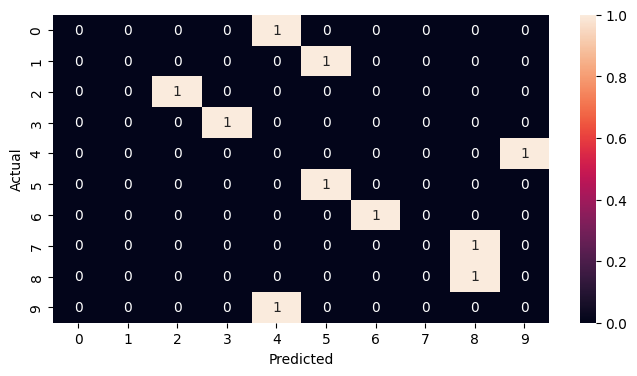

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_mn,y_pred_mn)
df_cm=pd.DataFrame(array,index=[i for i in range(10)],
                  columns=[i for i in range(10)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)

#### Sobre los datos de prueba  MNIST

<Axes: xlabel='Predicted', ylabel='Actual'>

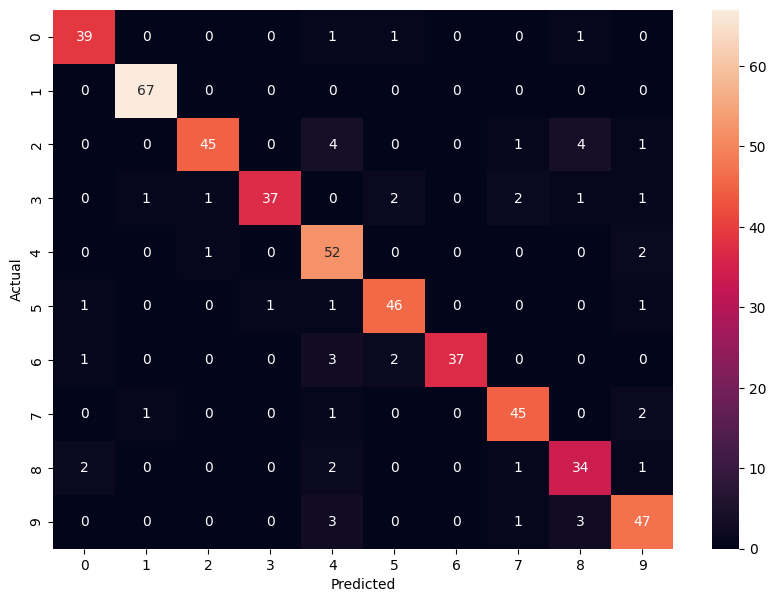

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(10)],
                  columns=[i for i in range(10)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True,fmt='d')

#### 1. Utilizando el mismo procedimiento del tutorial , encontrar la matriz de confusión para sus números. 

In [28]:
df_mn=pd.read_csv('datos/mis_numeros.csv',header=None,dtype='uint8')
X_mn=df_mn.iloc[:,1:]
y_mn=df_mn.iloc[:,0]
y_pred_mn=grid.predict(X_mn)

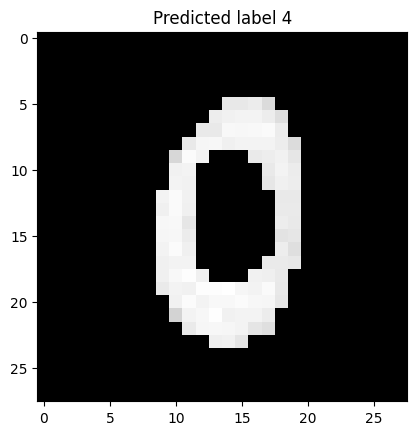

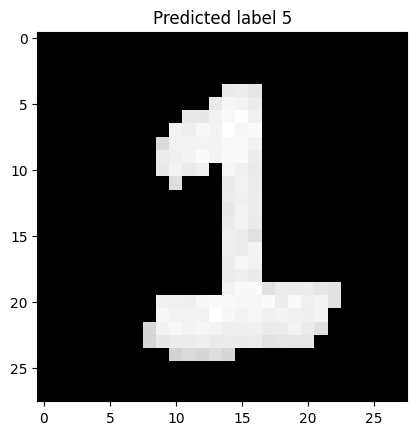

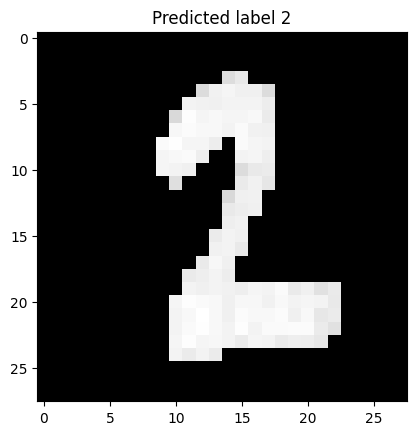

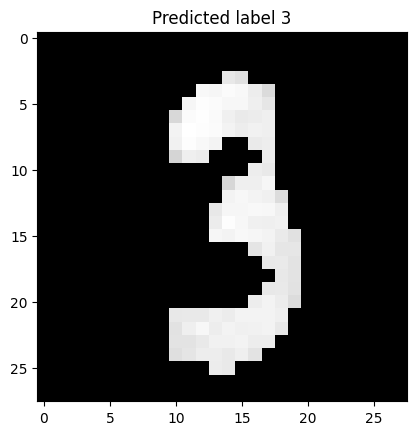

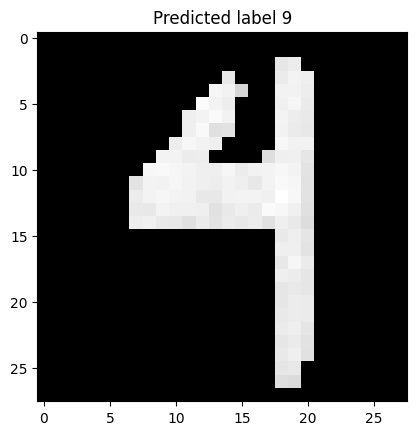

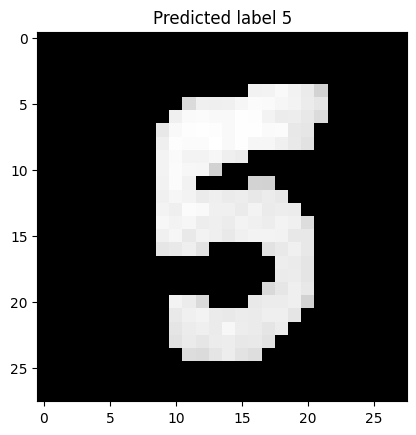

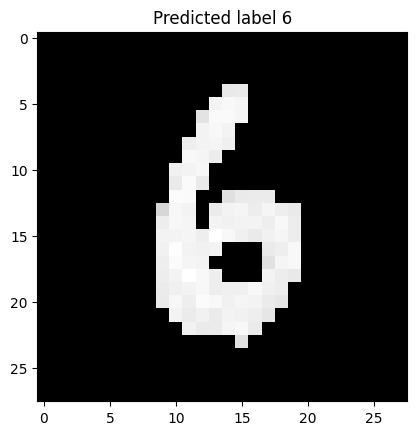

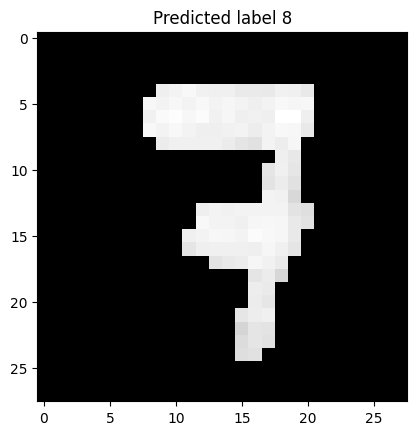

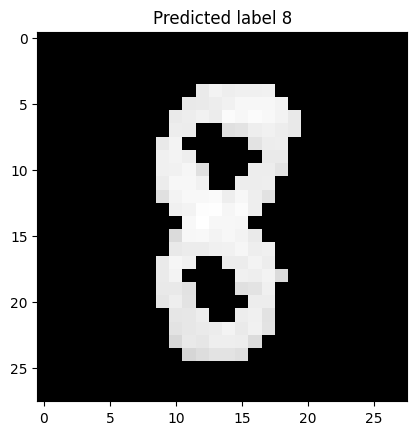

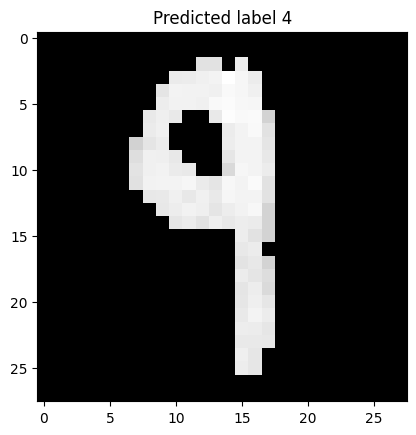

In [29]:
for i in range(10):
    img=X_mn.values[i].reshape((28,28))
    plt.title('Predicted label {0}'.format(y_pred_mn[i]))
    plt.imshow(img,cmap='gray')
    plt.show()

<Axes: xlabel='Predicted', ylabel='Actual'>

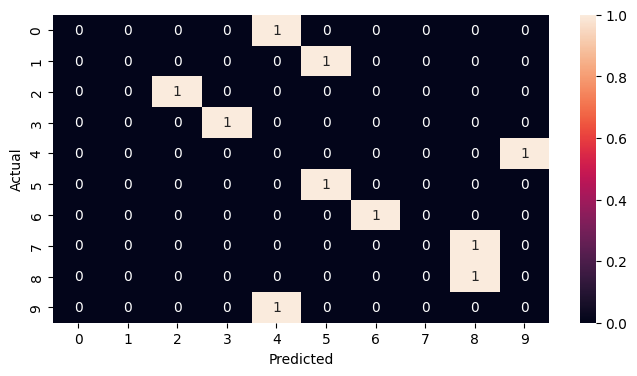

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_mn,y_pred_mn)
df_cm=pd.DataFrame(array,index=[i for i in range(10)],
                  columns=[i for i in range(10)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)